
Netflix_Image.png

# **Importing Pandas Library**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Dataset**

In [49]:
#Reading the CSV file data for Netflix
netflix_data = pd.read_csv('netflix.csv')

## **Exploring  the Data**

In [50]:
#Get basic information about the DataFrame
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [51]:
# Displaying data types of each column
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [52]:
#Finding out the DataFrame dimensionality
netflix_data.shape

(8807, 12)

In [53]:
# Summary statistics for numerical columns
netflix_data.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [54]:
#Viewing and understanding few 5 rows of the Netfix dataframe
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Data Cleaning, Data Analysis & Visualization**

#*Un-nesting the columns*

In [55]:
# Creating a function to un-nest a dataframe based on a specific column
def unnest_dataframe(df, column):
    return (df.drop(column, axis=1).join(df[column].str.split(',', expand=True).stack()
    .reset_index(level=1, drop=True).rename(column)))

# Un-nesting the 'cast' column
unnested_cast = unnest_dataframe(netflix_data, 'cast')

# Un-nesting the 'title' column
unnested_title = unnest_dataframe(netflix_data, 'title')

# Un-nesting the 'country' column
unnested_country = unnest_dataframe(netflix_data, 'country')

# Un-nesting the 'listed_in' (genre) column
unnested_listed_in = unnest_dataframe(netflix_data, 'listed_in')

# Un-nesting the 'director' column
unnested_director = unnest_dataframe(netflix_data, 'director')

# Showing the first few rows of the un-nested dataframes
# unnested_cast.head(1), unnested_country.head(1), unnested_listed_in.head(1), unnested_director.head(1)

# *Handling null values*

Check for missing values, handle duplicates, and clean the data as needed:

In [56]:
# Check for missing values
# netflix_data.isna().sum()
netflix_data.isnull().sum()
# It will display the count of missing values for each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

*For categorical variables with null values, update those rows as
unknown_column_name.*

In [57]:
categorical_columns = ['director', 'cast', 'country', 'listed_in', 'rating', 'date_added', 'release_year']
for i in categorical_columns:
  netflix_data[i].fillna(f'Unknown {i.capitalize()}', inplace=True)

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Replace with 0 for continuous variables having null values.

In [58]:
continous_var_columns = [ 'duration' ]
for i in continous_var_columns:
  netflix_data[i].fillna(0, inplace = True)

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [59]:
#Check for null values again to confirm the changes
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Find the counts of each categorical variable both using graphical and nongraphical analysis.

**For Non-graphical Analysis:**

In [60]:
#a) Non-graphical analysis: Value counts for each categorical variable

categorical_columns= ['director','type','country','listed_in', 'release_year', 'date_added','cast','rating', 'duration']
value_counts ={}
for column in categorical_columns: value_counts[column] =netflix_data[column].value_counts()

#Return the non-graphical analysis results
print(value_counts)

{'director': Unknown Director                  2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64, 'type': Movie      6131
TV Show    2676
Name: type, dtype: int64, 'country': United States                             2818
India                                      972
Unknown Country                            831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United

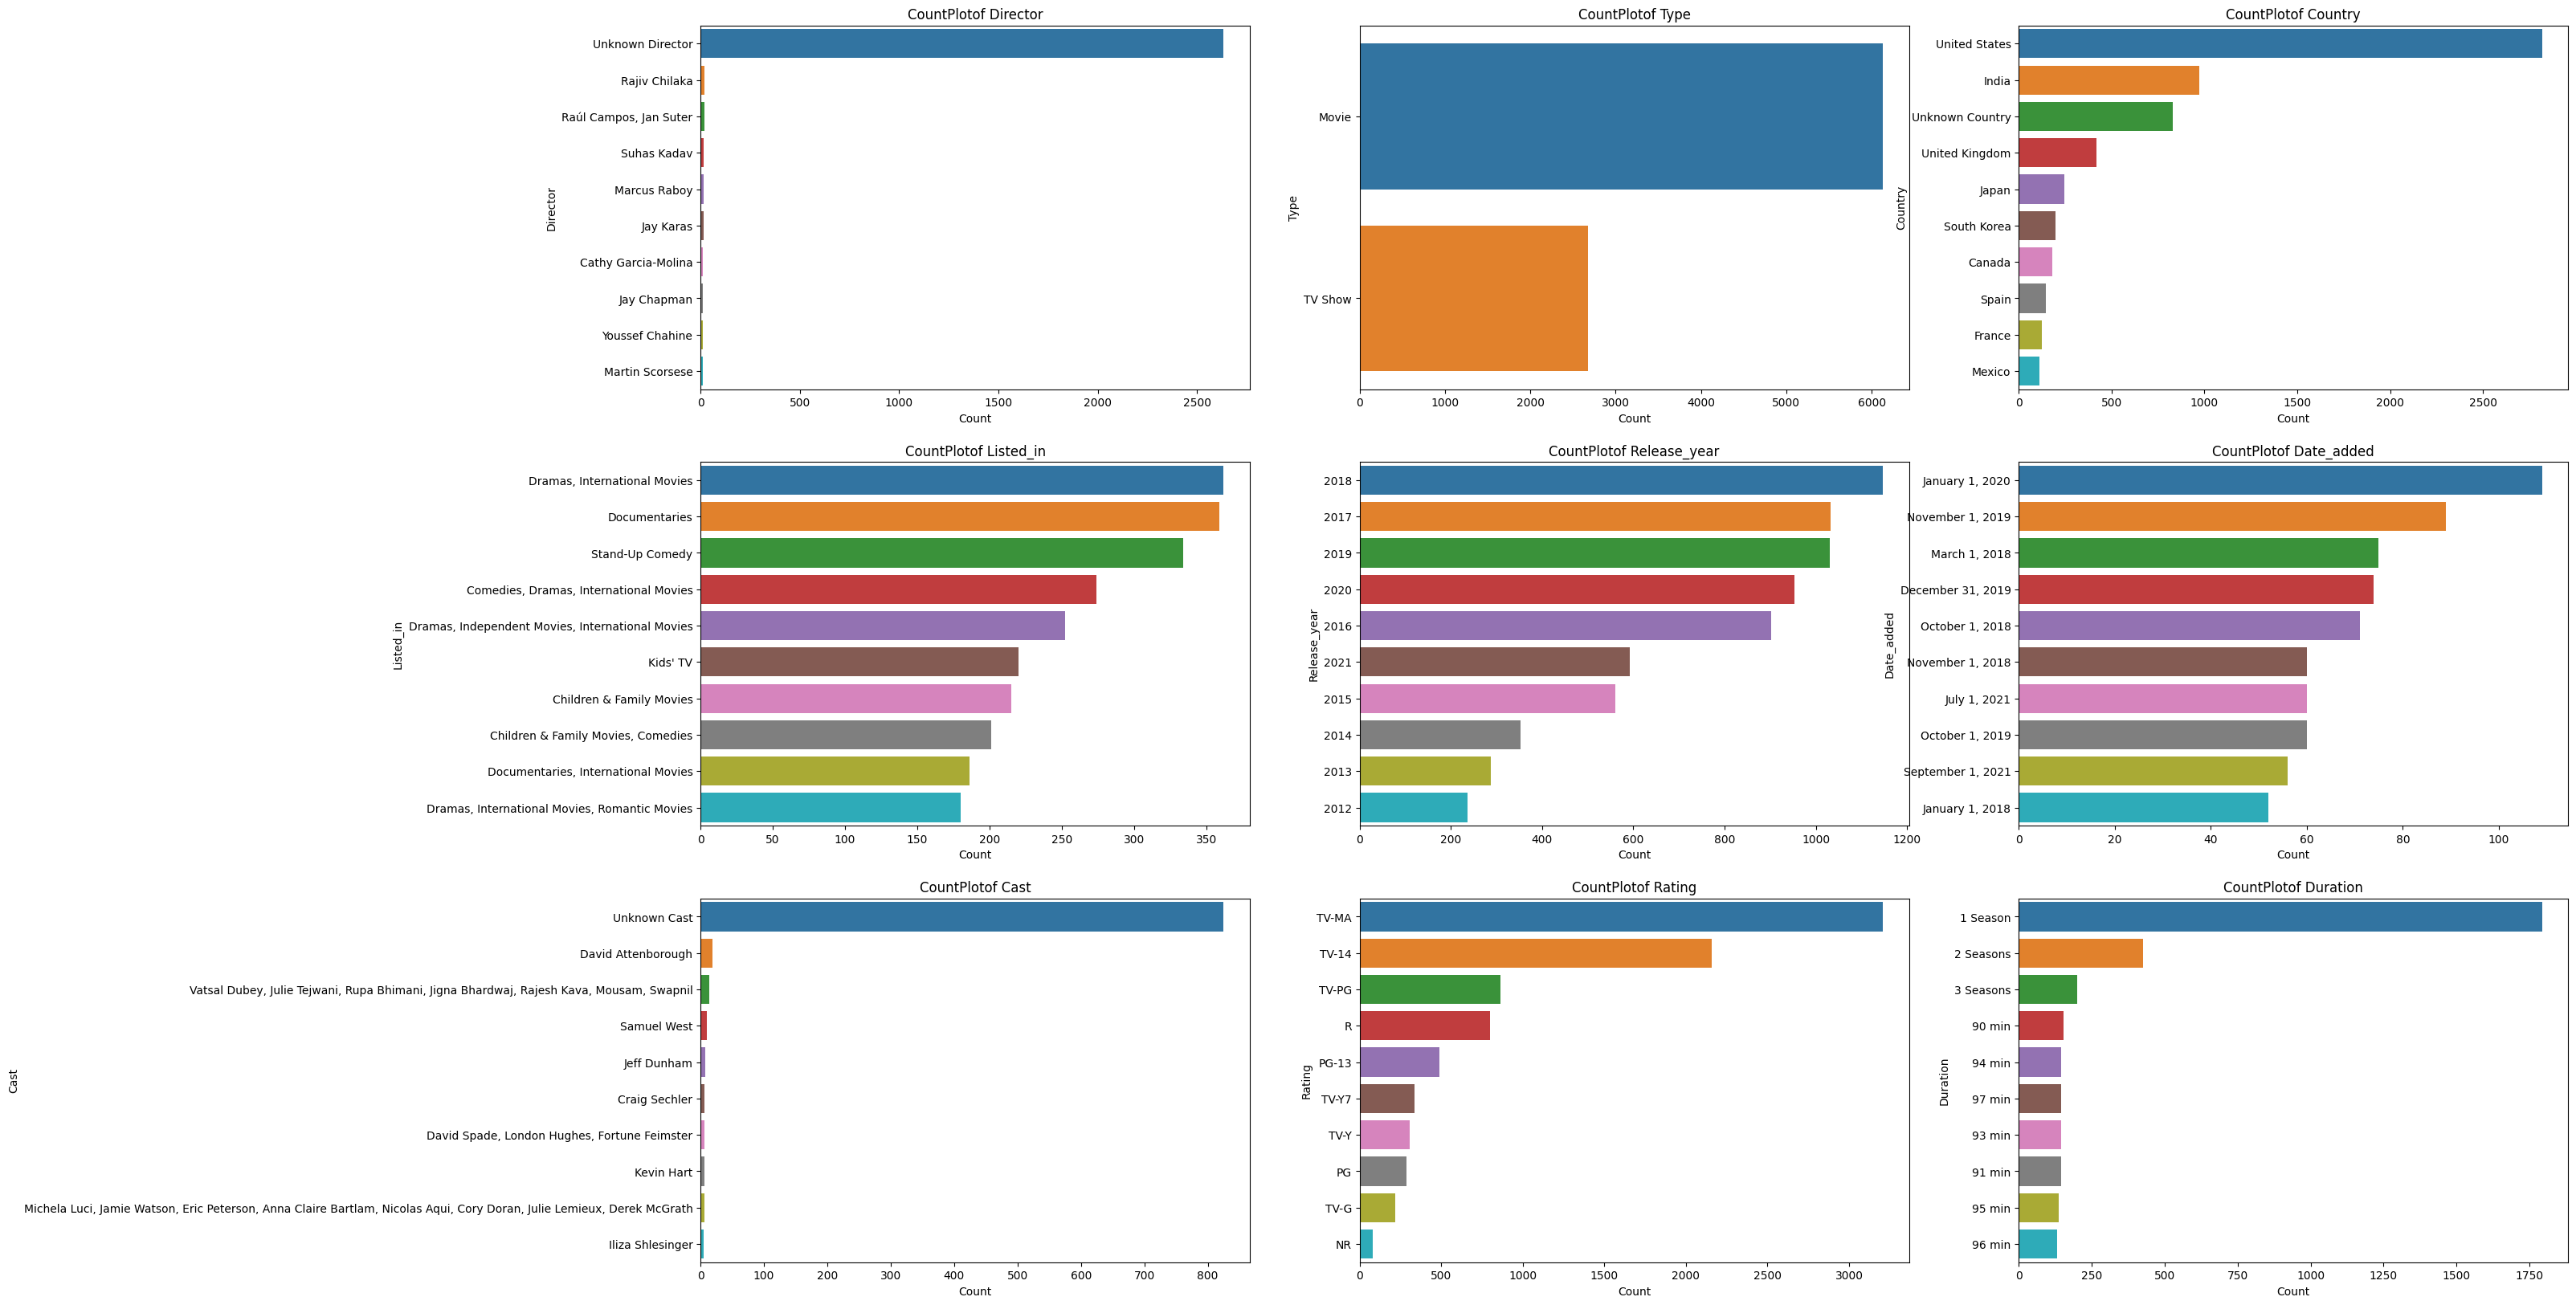

In [61]:
## Graphical analysis: Countplots for each categorical variable
fig,axes =plt.subplots(3, 3,figsize=(30, 20))
axes= axes.flatten()
for i, column in enumerate(categorical_columns):
  order =netflix_data[column].value_counts().index[:10]
  sns.countplot(y=netflix_data[column],order=order,ax=axes[i])
  axes[i].set_title(f'CountPlotof {column.capitalize()}')
  axes[i].set_xlabel('Count')
  axes[i].set_ylabel(column.capitalize())
  axes[i].tick_params(axis='y',labelsize=10)
  axes[i].tick_params(axis='x',labelsize=10)
plt.show()

**Insights:**

*Movie-Dominant Catalog:*

The analysis of the 'type' column indicates a higher number of movies compared to TV shows. This suggests that Netflix has a movie-dominant catalog, catering to a wide range of movie preferences.

*Dominance of U.S. Productions:*

Productions from the United States dominate the dataset in the 'country' column. This dominance may reflect either the availability of content or Netflix's strategic focus on American productions, aligning with its target audience.

*Growing Number of Releases:*

The 'release_year' data highlights a growing number of content releases over the years. Recent years show the highest counts, indicating Netflix's emphasis on continually expanding its content library with new releases.

*Common Content Ratings:*

The 'rating' column analysis reveals that TV-MA and TV-14 are the most common content ratings. This suggests that a significant portion of Netflix content is tailored for mature audiences, with a focus on diverse and potentially more mature themes.

*Unknown Director Entries:*

The 'director' column has a notable number of entries labeled as 'Unknown Director.' This suggests that there is room for improvement in data collection processes to reduce the number of entries where the director information is unknown.

**Recommendations:**

*Diversification of Content Types:*

Netflix should consider diversifying its content by balancing the number of movies and TV shows. This can be achieved by actively seeking and promoting a variety of engaging TV shows to cater to different viewer preferences.

*Improved Metadata Collection:*

Enhance the metadata collection process to reduce the number of entries labeled as 'Unknown.' Accurate and comprehensive metadata, including director information, contributes to a more informative and transparent user experience.

*Expansion of International Content:*

Explore opportunities to expand international content offerings to cater to a global audience. Including content from different regions and cultures can attract a diverse viewer base and contribute to Netflix's global appeal.

*Targeted Content for Different Age Groups:*

Given the current skew towards mature audiences (TV-MA and TV-14), Netflix should explore creating and promoting content tailored to different age demographics. This includes family-friendly content and shows targeting younger audiences to broaden its viewer base.

In [62]:
#Number of Unique Movies and TV Shows
unique_tv_shows = netflix_data.query('type == "TV Show"')['title'].nunique()
unique_movies = netflix_data.query('type == "Movie"')['title'].nunique()
unique_tv_shows, unique_movies

(2676, 6131)

In [63]:
# Counting the number of unique titles in each country using the unnested_country dataframe
unique_titles_per_country = unnested_country.groupby('country')['title'].nunique()

# Sorting the result in descending order
unique_titles_per_country_sorted = unique_titles_per_country.sort_values(ascending=False).head(10)

# Displaying the result
unique_titles_per_country_sorted


country
United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
 France            181
Spain              181
Name: title, dtype: int64

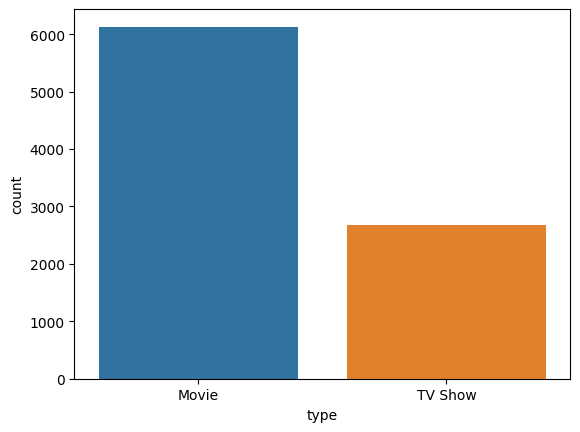

In [64]:
#Count of total movies and Tv shows
sns.countplot(data=netflix_data, x='type')
plt.show()

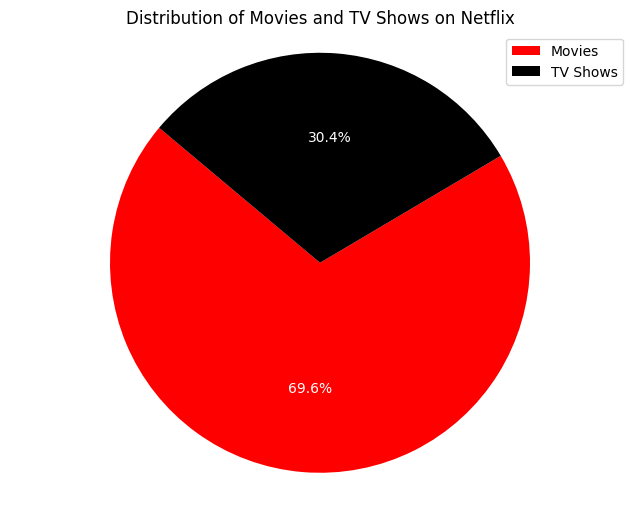

In [65]:
# Data for pie chart
labels = 'Movies', 'TV Shows'
sizes = [unique_movies, unique_tv_shows]
colors = ['red', 'black']

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'color':"white"})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding title and legend
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.legend()
# Show the pie chart
plt.show()

Insights:

Unique TV Shows:

The analysis reveals the number of unique TV shows available on Netflix.
Unique Movies:

The analysis also provides the count of unique movies available on Netflix.

#*Comparison of tv shows vs. movies*

Find the number of movies produced in each country and pick the top 10 countries.

In [66]:
df_cleaned = netflix_data[netflix_data['country']!= 'Unknown Country']
# Filter the DataFrame to consider only movies
count_of_movies = df_cleaned.query('type == "Movie"')

# Group by country and count the number of unique movie titles
count_of_movies = count_of_movies.groupby('country')['title'].nunique()

# Take the top 10 countries with the highest movie counts
top_countries_movies = count_of_movies.sort_values(ascending=False).head(10)

top_countries_movies

country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: title, dtype: int64

Find the number of Tv-Shows produced in each country and pick the top 10 countries.

In [67]:
df_cleaned = netflix_data[netflix_data['country']!= 'Unknown Country']

In [68]:
# Filter the DataFrame to consider only TV Shows
count_of_tvshows = df_cleaned.query('type == "TV Show"')

# Group by country and count the number of unique movie titles
tvshows_counts_by_country = count_of_tvshows.groupby('country')['title'].nunique()

# Take the top 10 countries with the highest tvshows counts
top_countries_tvshows = tvshows_counts_by_country.sort_values(ascending=False).head(10)

top_countries_tvshows


country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: title, dtype: int64

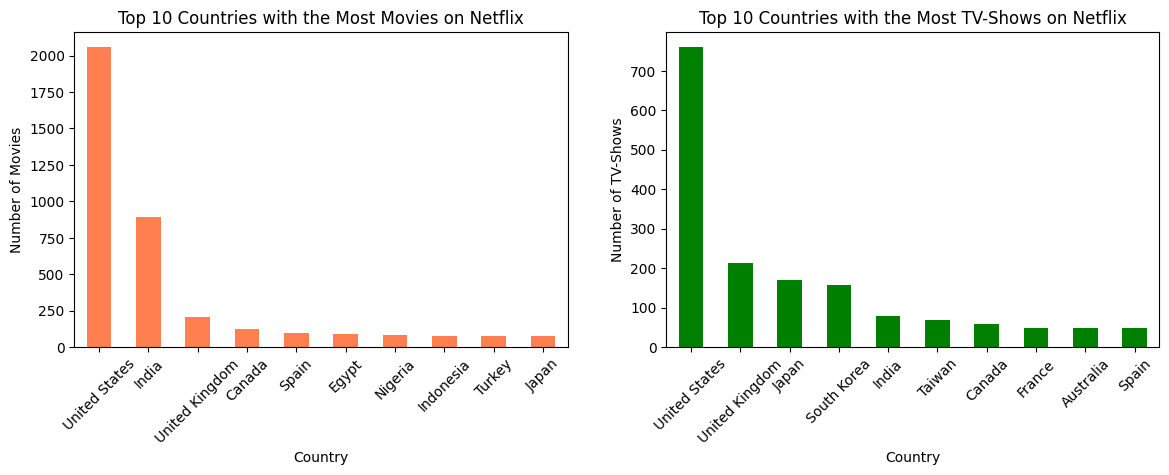

In [69]:
# Plotting the bar chart
plt.figure(figsize = (14,9))

plt.subplot(2,2,1)
top_countries_movies.plot(kind='bar', color='coral')
plt.title('Top 10 Countries with the Most Movies on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  # Adjust rotation for better readability

# Plotting the bar chart
plt.subplot(2,2,2)
top_countries_tvshows.plot(kind='bar', color='green')
plt.title('Top 10 Countries with the Most TV-Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of TV-Shows')
plt.xticks(rotation=45)  # Adjust rotation for better readability
plt.show()

**Insights:**

*TV Show and Movies Distribution by Country:*

The analysis provides information on the distribution of TV shows across different countries.

*Top Countries with Highest TV Show and Movies Counts:*
- The US, India and UK are the top 3 countries in Netflix movie production.
- US, UK and Japan are the top 3 producers of TV shows on Netflix.
- India produces relatively less no. of TV shows as compared to Movies.

The top countries with the highest number of TV shows and movies are identified based on the unique count of titles. These countries have a significant presence in contributing TV content to Netflix.

*Recommendations:*

Content Localization:

Given the high TV show and movies counts in certain countries, consider exploring opportunities for content localization. This could involve creating region-specific content or adapting existing shows to cater to the preferences of audiences in these top countries.

*Collaborations and Partnerships: *

Explore collaborations and partnerships with content creators, production houses, and talent from the top countries. This can strengthen relationships within the industry and potentially lead to the creation of more diverse and engaging TV shows and movies.

*Genre Preferences:*

Analyze the genre preferences of viewers in these top countries. Tailor content recommendations and new releases to align with the most popular genres in each region.

# *What is the best time to launch a TV show?*

Best week to release the Tv-show or the movie

In [70]:
# Convert the 'Date' column to datetime
netflix_data = netflix_data[netflix_data['date_added'] != 'Unknown Date_added']
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

# Extract the week from the 'Date' column
netflix_data['Week'] = netflix_data['date_added'].dt.isocalendar().week

# Filteration for Tv-shows
tv_shows = netflix_data.query('type == "TV Show"')
movies = netflix_data.query('type == "Movie"')

# Counting the number of titles per week and finding the week with the highest count
tv_shows_weekly  = tv_shows.groupby('Week')['title'].count()
movies_weekly = movies.groupby('Week')['title'].count()

best_tv_shows_week = tv_shows_weekly.idxmax()
best_movies_week = movies_weekly.idxmax()

print('The best week to release the TVshow:',best_tv_shows_week)
print('The best week to release the Movie:',best_movies_week)


The best week to release the TVshow: 27
The best week to release the Movie: 1


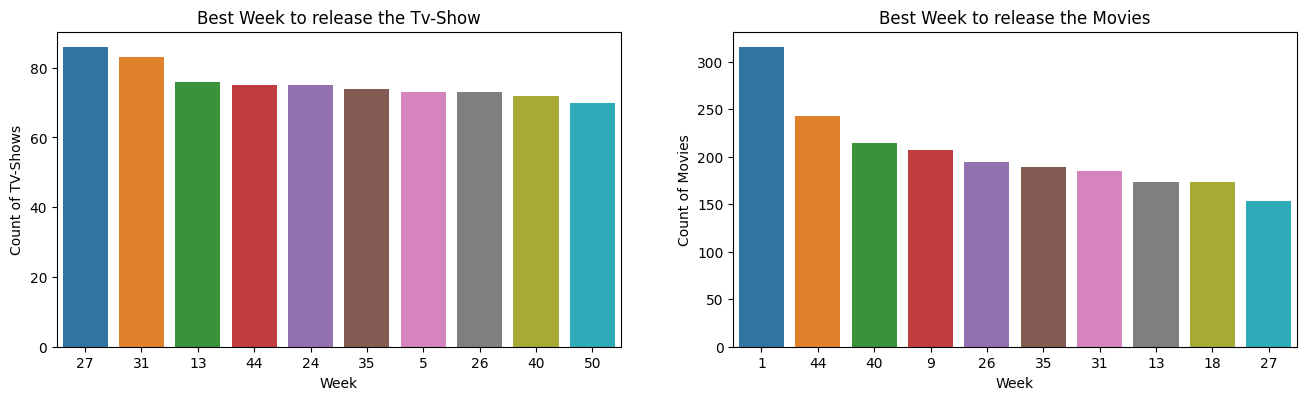

In [71]:
tv_shows_weekly= tv_shows_weekly.sort_values(ascending=False).iloc[:10]
movies_weekly= movies_weekly.sort_values(ascending=False).iloc[:10]

plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
sns.barplot(x=tv_shows_weekly.index,y=tv_shows_weekly.values,order=tv_shows_weekly.index)
plt.title('Best Week to release the Tv-Show')
plt.xlabel('Week')
plt.ylabel('Count of TV-Shows')

plt.subplot(2,2,2)
sns.barplot(x=movies_weekly.index,y=movies_weekly.values,order=movies_weekly.index)
plt.title('Best Week to release the Movies')
plt.xlabel('Week')
plt.ylabel('Count of Movies')
plt.show()

Best month to release the Tv-show or the movie

In [72]:
netflix_data['date_added'] = pd.to_datetime((netflix_data['date_added']))
netflix_data['Month'] = netflix_data['date_added'].dt.month

# Assuming 'tv_shows' is your DataFrame
tv_shows = netflix_data.query('type == "TV Show"')

# Assuming 'movies' is your DataFrame
movies = netflix_data.query('type == "Movie"')

# Counting the number of titles per month and finding the month with the highest count
# I've grouped by 'Month' and counted the number of movies and tv-shows, then sorted in descending order

tv_shows_monthly = tv_shows.groupby('Month')['show_id'].count()
movies_monthly = movies.groupby('Month')['show_id'].count()

best_tv_shows_month = tv_shows_monthly.idxmax()
best_movies_month = movies_monthly.idxmax()

print('The best month to release the TV show:', best_tv_shows_month)
print('The best month to release the Movie:',best_movies_month)


The best month to release the TV show: 12
The best month to release the Movie: 7


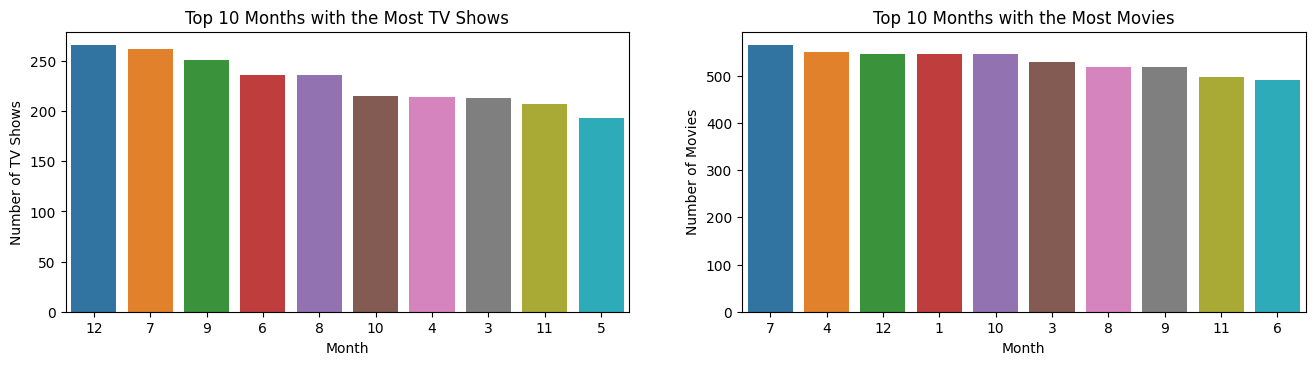

In [73]:
tv_shows_monthly = tv_shows_monthly.sort_values(ascending=False).iloc[:10]
movies_monthly = movies_monthly.sort_values(ascending=False).iloc[:10]

plt.figure(figsize = (16,8))
# Create a count plot directly from the DataFrame
plt.subplot(2,2,1)
sns.barplot(x=tv_shows_monthly.index,y=tv_shows_monthly.values,order=tv_shows_monthly.index)
plt.title('Top 10 Months with the Most TV Shows')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')

# Create a count plot directly from the DataFrame
plt.subplot(2,2,2)
sns.barplot(x=movies_monthly.index,y=movies_monthly.values,order=movies_monthly.index)
plt.title('Top 10 Months with the Most Movies')
plt.xlabel('Month')
plt.ylabel('Number of Movies')

plt.show()


Best Day to Release a TV Show

In [74]:
netflix_data['date_added'] = pd.to_datetime((netflix_data['date_added']))
netflix_data['Day'] = netflix_data['date_added'].dt.day_name()

# Assuming 'tv_shows' is your DataFrame
tv_shows = netflix_data.query('type == "TV Show"')
movies = netflix_data.query('type == "Movie"')

# Counting the number of titles per month and finding the month with the highest count
bestday_tv_shows = tv_shows.groupby('Day')['show_id'].nunique()
bestday_movies = movies.groupby('Day')['show_id'].nunique()

most_popular_tvshows_day = bestday_tv_shows.idxmax()
most_popular_movie_day = bestday_movies.idxmax()

print('The best day to release the TV show:', most_popular_tvshows_day)
print('The best day to release the Movie:',most_popular_movie_day)


The best day to release the TV show: Friday
The best day to release the Movie: Friday


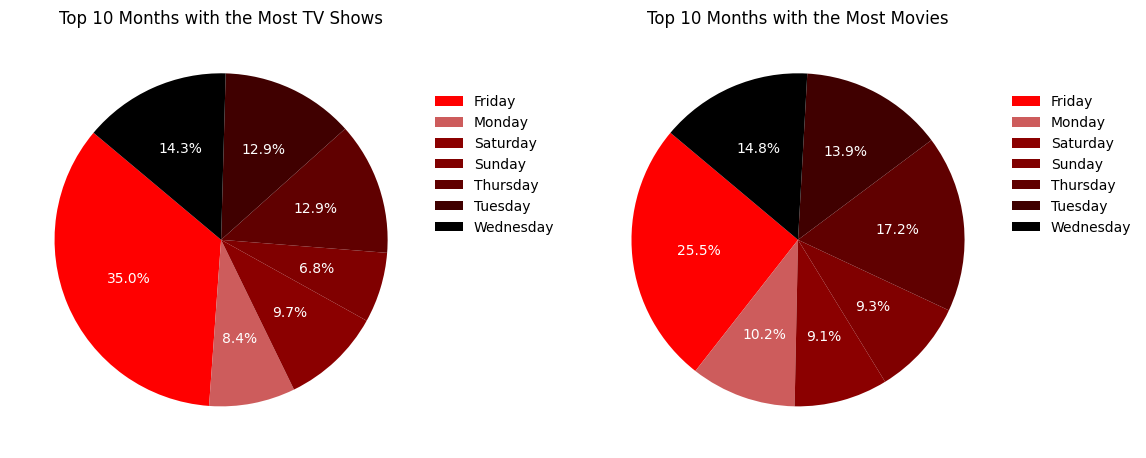

In [75]:
plt.figure(figsize = (12,9))
colors = ['#FF0000', '#CD5C5C', '#8B0000', '#800000', '#600000', '#400000', '#000000']

# Create a pie chart directly from the DataFrame
plt.subplot(2,2,1)
plt.pie(bestday_tv_shows.values, labels = bestday_tv_shows.index, autopct='%1.1f%%',
        colors = colors, startangle=140, textprops={'color':"white"}) # Create pie chart
plt.title('Top 10 Months with the Most TV Shows')
plt.legend(loc=(1, 0.5),frameon = False )


# Create a count plot directly from the DataFrame
plt.subplot(2,2,2)
plt.pie(bestday_movies.values, labels=bestday_movies.index, autopct='%1.1f%%',
        colors = colors, startangle=140, textprops={'color':"white"}) # Create pie chart
plt.title('Top 10 Months with the Most Movies')
plt.legend(loc=(1, 0.5),frameon = False )
plt.tight_layout()
plt.show()


**Insights**

*Seasonal Distribution of Releases:*

The graphs visually represent the distribution of releases throughout the year. Clear peaks indicate the most popular times for launching new content.

*Optimal Timing for TV Shows:*

The analysis suggests that the best time to launch a TV show on Netflix is during the 27th week of the year. Additionally, the month of December stands out as a favorable period for TV show releases.

*Optimal Timing for Movies:*

For movies, the best week to launch is the 1st week of the year, and the best month is July. These specific weeks and months are identified as peak times for movie releases.

Movies are prominently released in weeks falling in July, early October, late February to early March, late June to early July, and late August to early September.

This pattern suggests that movie production peaks around the beginning of summer, early fall, and late winter/early spring periods.

**Recommendations:**

*Strategic Content Release:*

Plan content releases strategically based on insights about the best months for TV shows and movies. Aligning releases with peak months can maximize viewership and engagement.

*Promotions and Marketing:*

Implement marketing and promotional activities during the identified peak months to enhance visibility and attract a larger audience. Consider special campaigns or collaborations to boost content awareness.

*Diversify Content Types:*

Analyze whether certain genres or types of content perform better in specific months. Diversify content offerings to cater to varied audience preferences throughout the year.
Optimal Release Day:

Utilize insights about the best day to release TV shows and movies to optimize release schedules. This information can be crucial for creating impact and maximizing viewership on the most popular days.

*Viewer Engagement Strategies:*

Implement engagement strategies, such as interactive features, social media campaigns, or live events, during the identified best months and days. This can enhance the overall viewer experience.

*Continuous Monitoring:*

Regularly monitor viewership trends and update release strategies based on evolving audience preferences. Keep track of changing patterns to stay adaptable and responsive.

*Collaboration Opportunities:*

Explore collaboration opportunities with influencers, other content creators, or events during the best months. Collaborative efforts can amplify the reach and impact of content releases.
By incorporating these recommendations, Netflix can optimize its content release strategy, improve audience engagement, and maintain a dynamic and successful platform throughout the year.

# *Analysis of actors/directors of different types of shows/movies*

Identify the top 10 actors who have appeared in most movies or TV shows

In [76]:
# Stripping any leading/trailing whitespace from the cast names
unnested_cast['cast'] = unnested_cast['cast'].str.strip()

In [77]:
# Grouping by 'cast' and counting unique 'show_id' (titles)
unique_cast_titles_count = unnested_cast.groupby('cast')['show_id'].nunique().sort_values(ascending=False).head(10)
unique_cast_titles_count

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: show_id, dtype: int64

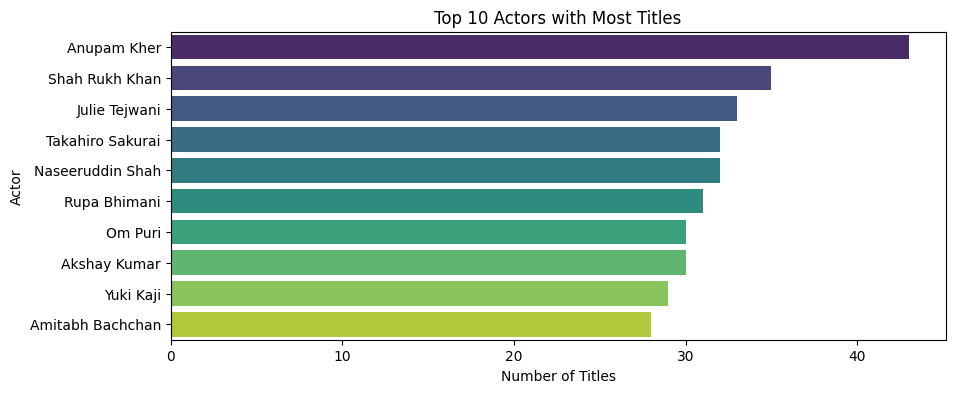

In [78]:
#Plotting the top 10 actors
plt.figure(figsize=(10, 4))
sns.barplot(y=unique_cast_titles_count.index,x=unique_cast_titles_count.values,palette='viridis')
plt.title('Top 10 Actors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

**Insights:**

*Prolific Presence of Anupam Kher:*

Anupam Kher leads the cast with 43 appearances, indicating a prolific and enduring presence in the entertainment industry. This suggests a consistent and valued contribution to various projects.

*Widespread Popularity of Shah Rukh Khan:*

Shah Rukh Khan closely follows with 35 appearances, reflecting widespread popularity and an extensive body of work. His presence suggests a strong appeal to a broad audience.

*Global Diversity in Cast:*

The list includes actors from different regions, showcasing a broad global appeal. For instance, renowned Japanese voice actors Takahiro Sakurai and Yuki Kaji bring diversity to the cast.

*Balanced Mix of Veteran and Newer Talents:*

The presence of actors such as Naseeruddin Shah and Amitabh Bachchan indicates a balance between veteran actors and newer talents. This blend can offer a diverse and dynamic range of performances.

**Recommendations based on Insights:**

*Collaboration with Influential Actors:*

Given the prolific presence of Anupam Kher and the widespread popularity of Shah Rukh Khan, Netflix could consider collaborating with these influential actors. Such collaborations can attract their established fanbases, contributing to the success of Netflix projects.

*Exploration of Global Content:*

The inclusion of international talents like Takahiro Sakurai and Yuki Kaji suggests an opportunity for Netflix to explore and create diverse content for global audiences. This can enhance the platform's international appeal and reach.

*Leverage Veteran Talent for Quality Content:*

Leveraging the experience and gravitas of veteran actors like Naseeruddin Shah and Amitabh Bachchan can help Netflix in producing high-quality, critically acclaimed content. Their involvement can add depth and credibility to the platform's content offerings.

**Conclusion:**

By considering these insights and recommendations, Netflix can make informed decisions about casting choices, content creation, and audience engagement. The combination of established and diverse talents can contribute to the platform's success in attracting a broad and engaged viewer base.

Finding the top 10 directors who have appeared in most movies or TV shows

## Identify the top 10 directors who have appeared in most movies or TV shows

In [79]:
# Group by 'director' and count unique occurrences, then sort in descending order
director_unique = unnested_director.groupby('director')['title'].nunique().sort_values(ascending=False).head(10)

director_unique

director
Rajiv Chilaka          22
Raúl Campos            18
 Jan Suter             18
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Martin Scorsese        12
Youssef Chahine        12
Name: title, dtype: int64

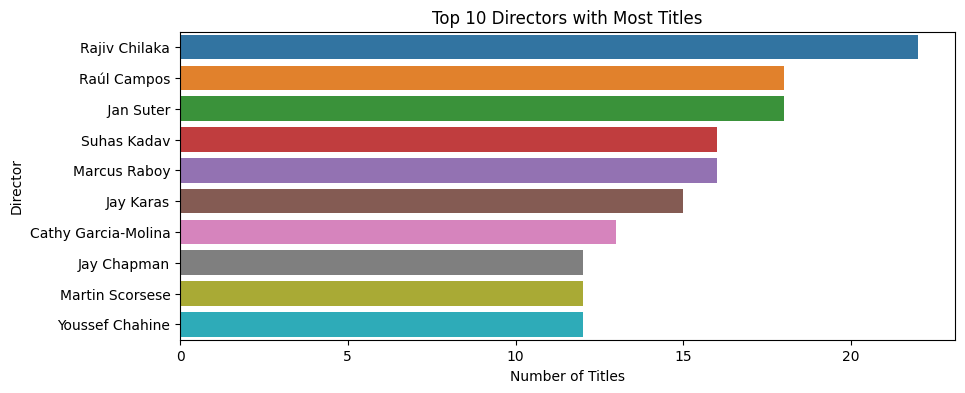

In [80]:
#Creating a barplot for the top 10 directors
plt.figure(figsize=(10, 4))
sns.barplot(y=director_unique.index,x=director_unique.values)
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

**Insights:**

Top Three Directors:

Rajiv Chilaka, Raúl Campos, and Jan Suter are the top three directors with 22, 18, and 18 productions, respectively, showcasing their prolific contribution to Netflix's content library.

**Diversity in Content Creation:**

The list includes directors from different backgrounds and regions, highlighting Netflix's commitment to diversity in content creation.

**Martin Scorsese's Presence:**

Acclaimed filmmaker Martin Scorsese is among the top 10 directors, emphasizing Netflix's focus on collaborating with established industry talent.
Recommendations:

**Collaboration and Expansion:**

Netflix could continue to collaborate with prolific directors like Rajiv Chilaka, Jan Suter, and Raúl Campos to maintain a diverse and extensive content library.

**Emerging Talent:**

The presence of directors like Suhas Kadav and Marcus Raboy implies an openness to working with emerging talent.
This suggests the importance of supporting and nurturing new voices in the industry.

**Quality Content:**

Utilize the experience and expertise of directors like Martin Scorsese to create high-quality, acclaimed content that attracts a wide audience.
Regional Content:

Directors such as Cathy Garcia-Molina and Youssef Chahine could be leveraged to explore and produce regional content, catering to diverse audiences around the world.
These recommendations emphasize collaboration, support for emerging talent, focus on quality, and exploration of regional content to enhance Netflix's content offerings.

## Which genre movies are more popular or produced more

In [ ]:
!pip install wordcloud

In [82]:
from wordcloud import WordCloud

movies_data = netflix_data[netflix_data['type'] == 'Movie']

# Filtering the dataset for movies
movies_genre_data = unnest_dataframe(movies_data, 'listed_in')

# Stripping any leading/trailing whitespace from the genre names
movies_genre_data['listed_in'] = movies_genre_data['listed_in'].str.strip()


# Value counts of genres/categories
genre_counts = movies_genre_data['listed_in'].value_counts().sort_values(ascending=False).head(10)
genre_counts


International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: listed_in, dtype: int64

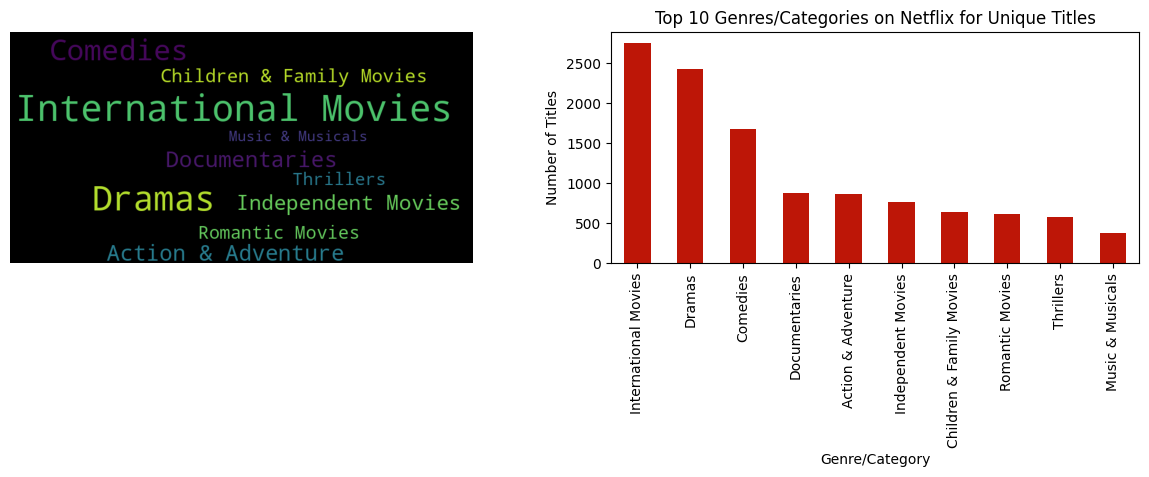

In [83]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', min_font_size = 10).generate_from_frequencies(genre_counts)

# Plotting using seaborn for styling
plt.figure(figsize=(15, 3),facecolor=None)

plt.subplot(1,2,1)
# Display the word cloud using matplotlib
plt.imshow(wordcloud)
plt.axis("off")

# Creating a bar plot for the value counts of categories/genres for unique titles in Netflix
plt.subplot(1,2,2)
genre_counts.head(10).plot(kind='bar', color='#bd1607')

# Adding plot title and labels
plt.title('Top 10 Genres/Categories on Netflix for Unique Titles')
plt.xlabel('Genre/Category')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)  # Rotating the genre labels for better readability

# Displaying the plot
plt.show()


**Insights:**

Most movie produced genre are produced in the Internation movies, Dramas, Comedies, followed by Documentaries, any many more.

**Recommendations:**

Content Acquisition and Creation:

Consider acquiring or creating more content in the most popular genres. This can attract a larger audience and enhance user engagement.
Content Curation:

Curate and highlight movies from diverse genres to cater to a broader audience with different preferences.

User Recommendations:

Leverage user data and preferences to provide personalized recommendations for movies in genres that users might enjoy based on their viewing history.
Genre-Specific Promotions:

Run promotions or campaigns to promote movies from specific genres, especially those that are less explored. This can help users discover new content.


User Surveys:

Conduct user surveys or gather feedback to understand preferences and identify potential gaps in content offerings. This can inform decisions on acquiring or producing content in specific genres.
Dynamic Content Library:

Regularly update and refresh the content library to keep it dynamic and in line with evolving viewer preferences.

# *After how many days the movie will be added to Netflix after the release of the movie*

In [84]:
# Converting 'date_added' and 'release_year' to datetime for calculation
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['release_date'] = pd.to_datetime(netflix_data['release_year'], format='%Y')

# Calculating the difference in days between 'date_added' and 'release_date'
netflix_data['days_to_add'] = (netflix_data['date_added'] - netflix_data['release_date']).dt.days

# Calculating the average time to add a title after its initial release
average_days_to_add = netflix_data['days_to_add'].mean()

# Calculating the mode time to add a title after its initial release
mode_days_to_add = netflix_data['days_to_add'].mode()[0]


print('The average days of adding a movie after its release on Netflix: ', round(average_days_to_add,2))
print('The mode days of adding a movie after its release on Netflix:', mode_days_to_add)

The average days of adding a movie after its release on Netflix:  1895.37
The mode days of adding a movie after its release on Netflix: 334


**Insights:**

After release it will take approximately 334 days to be added in Netflix for most of the Movies/Tv shows.

These insights suggest that while the averageduration is relatively long, there are specific time periods,such as the mode of 334.0 days that are more prevalent in the acquisition and addition of movies to Netflix following their original release.


**Brief Recommendations:**

Most content on Netflix is rated for adults (TV-MA), indicating a liking for mature, violent, and sexual content. To grow its audience, Netflix could focus more on different genres.

Best Times to Release: Holidays, especially from November to January, and during the summer in June are great times to launch new content on Netflix.

Popular Genres: Drama, comedy, crime, action, and adventure are the most liked genres. Netflix should create more movies and shows in these categories.

Japanese Actors and TV Shows: Japanese actors are well-liked in Netflix TV shows, particularly in the US, UK, Japan, and South Korea.

Indian Actors and Movies:Indian actors have starred in the most Netflix movies, showing that Netflix movies are quite popular in India.


**Simplified Summary:**

Adult-rated content is popular; releasing during holidays and summer works best. Dramas, comedies, crimes, actions, and adventures are loved genres. Indian actors dominate movies, and Japanese actors shine in TV shows on Netflix.

# Exploring potential correlations in the relationship between a unique title's rating (like TV-MA, TV-PG) and its genre or duration.

In [86]:
movies_data = netflix_data[netflix_data['type'] == 'Movie']

In [87]:
# We'll use the unnested version of the 'listed_in' column for this analysis
# Also, we'll need to convert 'duration' into a numeric value for movies
movies_data['duration_numeric'] = movies_data['duration'].str.extract('(\d+)').astype(float)

# Exploring the relationship between a movie's rating and its genre
genre_rating = unnest_dataframe(movies_data, 'listed_in').groupby(['rating', 'listed_in']).size().unstack().fillna(0)

# Exploring the relationship between a movie's rating and its duration
duration_rating = movies_data.groupby('rating')['duration_numeric'].mean()

genre_rating, duration_rating

<ipython-input-87-b1fd4d3cfb1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration_numeric'] = movies_data['duration'].str.extract('(\d+)').astype(float)


(listed_in        Anime Features   Children & Family Movies   Classic Movies  \
 rating                                                                        
 66 min                      0.0                        0.0              0.0   
 74 min                      0.0                        0.0              0.0   
 84 min                      0.0                        0.0              0.0   
 G                           0.0                        0.0              4.0   
 NC-17                       0.0                        0.0              0.0   
 NR                          0.0                        0.0              0.0   
 PG                          1.0                       16.0             12.0   
 PG-13                       2.0                        9.0              4.0   
 R                           0.0                        0.0              8.0   
 TV-14                      20.0                        1.0              4.0   
 TV-G                        0.0        

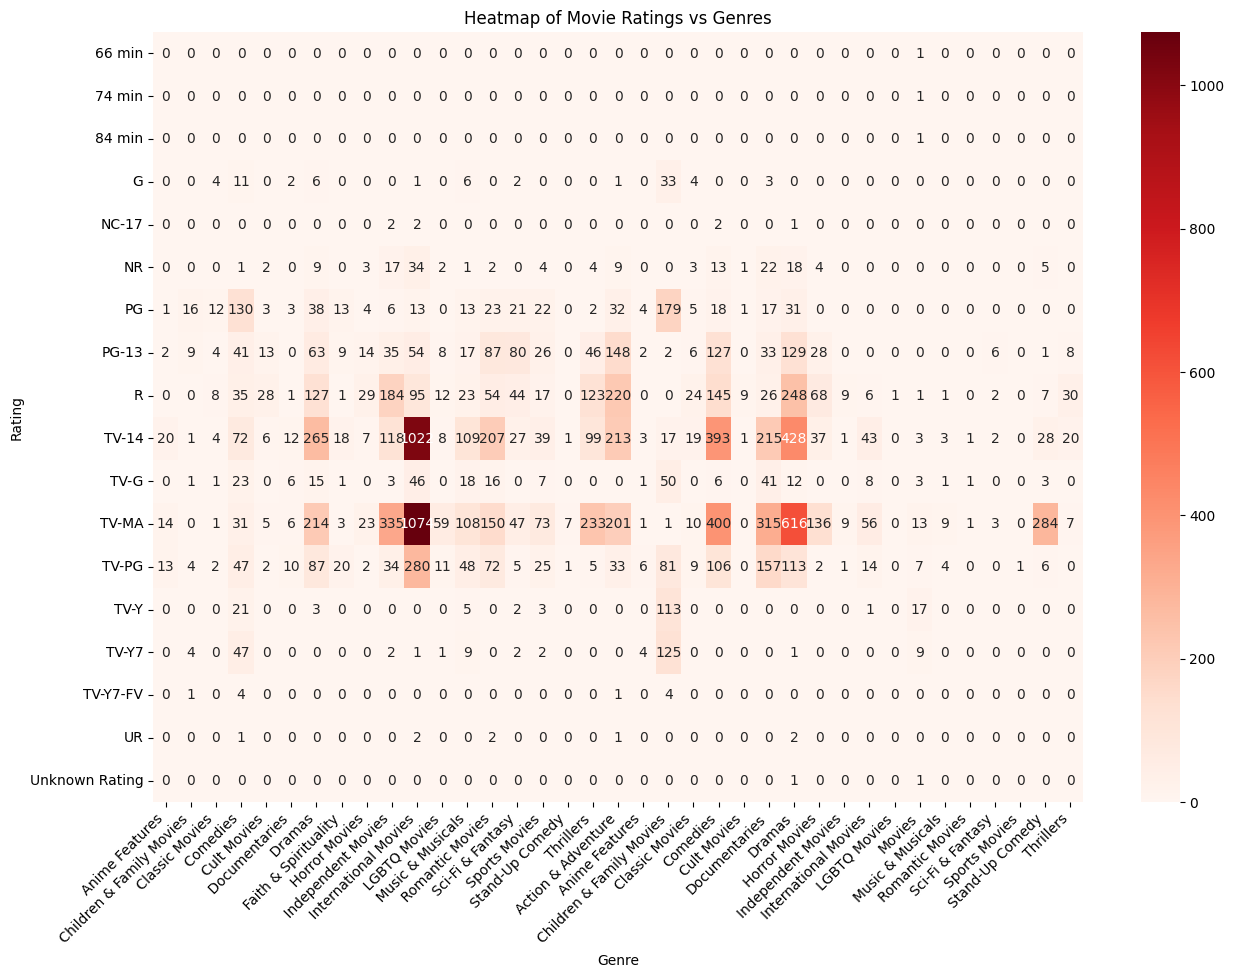

In [89]:
# Creating a heatmap for the relationship between movie rating and genre
plt.figure(figsize=(15, 10))
sns.heatmap(genre_rating, cmap='Reds', annot=True, fmt=".0f")
plt.title('Heatmap of Movie Ratings vs Genres')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Note: The heatmap represents the count of movies in each genre-rating combination.
# Higher counts are represented by darker shades of red.

**Marketing and Promotion:**
Knowing which genres are popular in certain rating categories can inform targeted marketing and promotional strategies. For example, promoting family-friendly genres in regions with a high number of subscribers with children.

**Content Strategy and Planning:**
Understanding which genres are prevalent in certain ratings can help Netflix in content acquisition and production planning. For example, if there's a high number of 'Dramas' in the 'TV-MA' category, it might indicate a demand for more mature, complex narratives, guiding Netflix to invest in similar content.

**Viewer Preferences and Trends:**
The genre-rating relationship can reveal viewer preferences and trends. For instance, a surge in 'Horror' movies with 'R' rating might reflect an increased interest in adult-themed horror content.

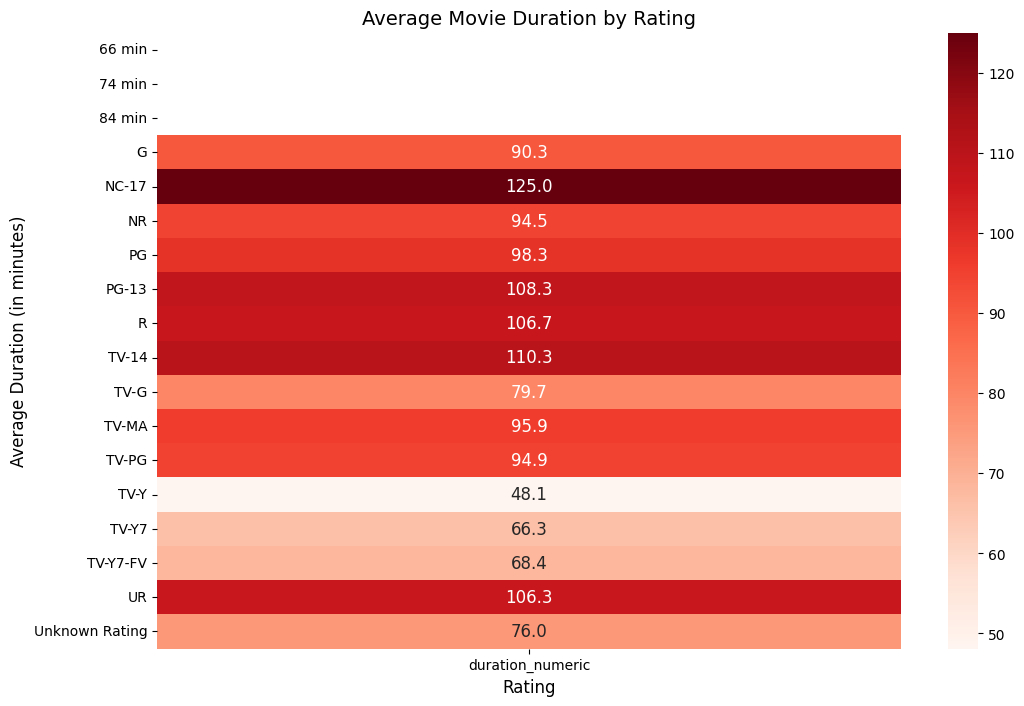

In [88]:
# Convert the Series to a DataFrame
duration_rating_df = duration_rating.reset_index()

# Setting up the figure with a larger size for better readability
plt.figure(figsize=(12, 8))

# Creating the heatmap
# Since now 'duration_rating_df' is a DataFrame, we can use it directly
sns.heatmap(duration_rating_df.set_index('rating'), cmap='Reds', annot=True, fmt=".1f", annot_kws={'size': 12})

# Setting the title and labels with increased font size
plt.title('Average Movie Duration by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Average Duration (in minutes)', fontsize=12)

# Showing the heatmap
plt.show()

**Longer Movies in Certain Ratings:**

Ratings like 'NC-17' and 'R' show longer average durations. This could indicate that more mature content (often found in these categories) tends toward longer storytelling formats.

**Shorter Movies in Family-Friendly Ratings:**

Ratings like 'G', 'TV-Y', and 'TV-Y7' have shorter average durations. This aligns with the expectation that content aimed at younger audiences is often shorter to match their attention spans.

Consistency in Popular Ratings: **bold text**

Ratings like 'PG', 'PG-13', and 'TV-MA' show a consistent average duration around 90-110 minutes, typical for feature films.


# Average Duration of Movies across Different Genres

In [90]:
# Handling NaN values in 'duration' column
# It's possible that some movie durations are not provided, so we'll replace NaNs with the mean duration
mean_duration = movies_data['duration'].str.replace(' min', '').astype(float).mean()
movies_data['duration'] = movies_data['duration'].str.replace(' min', '').fillna(mean_duration).astype(int)

# Repeating the un-nesting and averaging process
unnested_genre = unnest_dataframe(movies_data, 'listed_in')
average_duration_per_genre = unnested_genre.groupby('listed_in')['duration'].mean().reset_index()
average_duration_per_genre.sort_values(by='duration', ascending=False)

<ipython-input-90-7dab7f3c9c5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration'] = movies_data['duration'].str.replace(' min', '').fillna(mean_duration).astype(int)


,listed_in,duration
2,Classic Movies,127.138889
6,Dramas,116.288996
21,Classic Movies,114.825000
18,Action & Adventure,113.515716
25,Dramas,111.377500
13,Romantic Movies,110.706362
10,International Movies,110.461509
17,Thrillers,108.082031
28,International Movies,108.062500
12,Music & Musicals,106.960784


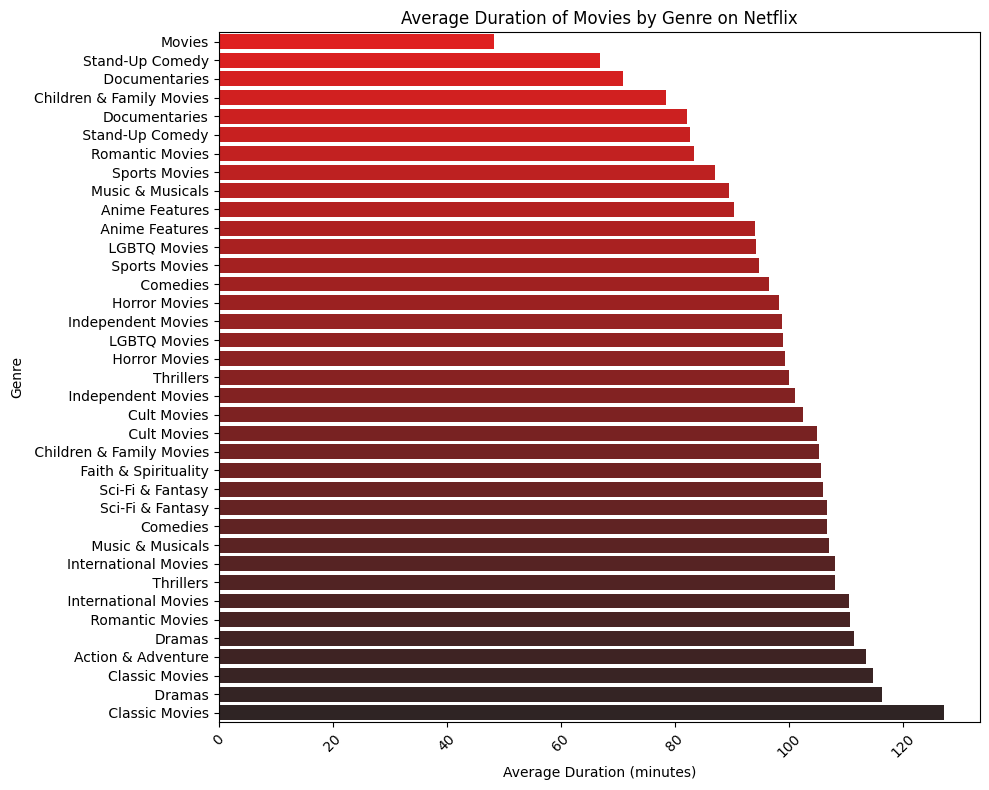

In [91]:
# Sorting the data for a better plot
sorted_data = average_duration_per_genre.sort_values(by='duration', ascending=True)

# Setting the color palette to shades of red and black
palette = sns.color_palette("dark:red_r", len(sorted_data))

# Creating the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="duration", y="listed_in", data=sorted_data, palette=palette)
plt.title('Average Duration of Movies by Genre on Netflix')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

**Genre-Specific Duration Trends:**

Classic Movies and Dramas tend to have longer durations. This could be attributed to the narrative depth and character development often required in these genres.

Documentaries and Stand-Up Comedy typically have shorter durations. Documentaries may aim for conciseness to effectively deliver factual content, while stand-up comedy specials are generally shorter to maintain audience engagement.

**Viewer Preferences and Consumption Patterns:**

Shorter durations in genres like documentaries might align with viewers' preferences for concise, informative content that can be consumed in a single sitting.

Longer films in genres like dramas and classic movies might be more appealing to viewers who prefer in-depth storytelling and are willing to commit more time to a single movie.

**Recommendations:**

*Strategic Release Timing:*

The time series analysis of content added could guide Netflix in optimizing the timing of new releases. Understanding seasonal patterns or specific times when subscribers are more likely to watch new content can help in planning release schedules. According to my Analysis, Fridays are the most popular day for releases; week 1 is the most popular for Movies and week 27 is the most popular for TV Shows. July is the best month to release a Movie and December is the best month to release a TV Show.

*Expand Popular Genres in Key Ratings:*

If certain genres are performing well in specific rating categories, consider increasing the production or acquisition of similar content to cater to the established audience. For instance, TV-MA & TV-14 in International Movies and TV-MA in Dramas is a very popular rating-genre pair.